In [2]:
import pandas as pd

# Load the CSV file
file_path = '/content/environmental_data.csv'  # Replace with the correct path if different
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())


   Temperature  Humidity  Pressure
0           23        63       947
1           39        87      1073
2            8         8       941
3           46        50       930
4           10       100      1083


Display basic information about the dataset

In [9]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  20 non-null     int64
 1   Humidity     20 non-null     int64
 2   Pressure     20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes
None


# Display the first few rows of the datase

In [10]:
print("\nPreview of the Dataset:")
print(data.head())


Preview of the Dataset:
   Temperature  Humidity  Pressure
0           23        63       947
1           39        87      1073
2            8         8       941
3           46        50       930
4           10       100      1083


# Descriptive Statistics for the Dataset

In [11]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Temperature   Humidity     Pressure
count    20.000000   20.00000    20.000000
mean     25.100000   51.30000   991.500000
std      14.322966   30.59945    59.946028
min      -2.000000    8.00000   906.000000
25%      13.750000   26.25000   944.000000
50%      22.000000   47.00000   993.000000
75%      37.500000   77.75000  1036.250000
max      46.000000  100.00000  1083.000000


# Line Graph using Seaborn

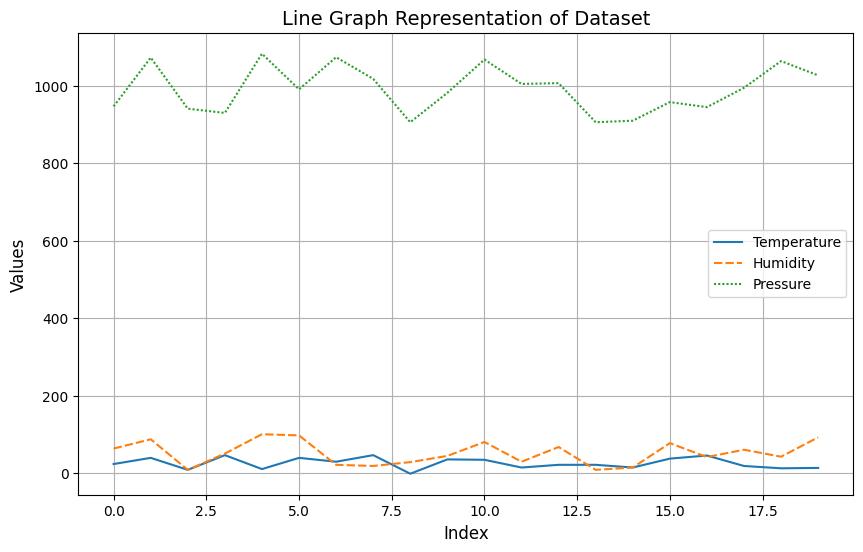

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data)
plt.title("Line Graph Representation of Dataset", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.grid(True)
plt.show()

Pie Chart


Index(['Temperature', 'Humidity', 'Pressure'], dtype='object')


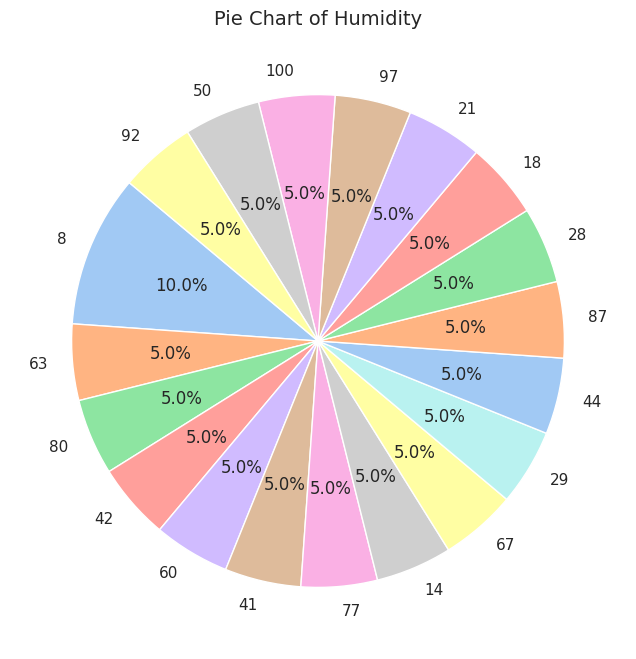

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file
file_path = '/content/environmental_data.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Print the available columns to check for suitable column for pie chart
print(data.columns)

# Choose a column for the pie chart
# Replace 'suitable_column' with an actual column name from the printed list
# This column should be categorical or have a limited number of unique values
suitable_column = 'Humidity'  # Replace with a suitable column name

# Create pie chart data
pie_data = data[suitable_column].value_counts()

# Apply Seaborn style for visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("pastel", len(pie_data)))
plt.title(f"Pie Chart of {suitable_column}", fontsize=14)
plt.show()

 Bar Graph using Seaborn

<ipython-input-21-cb96e0d59734>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]], ci=None)  # Update column selection as needed


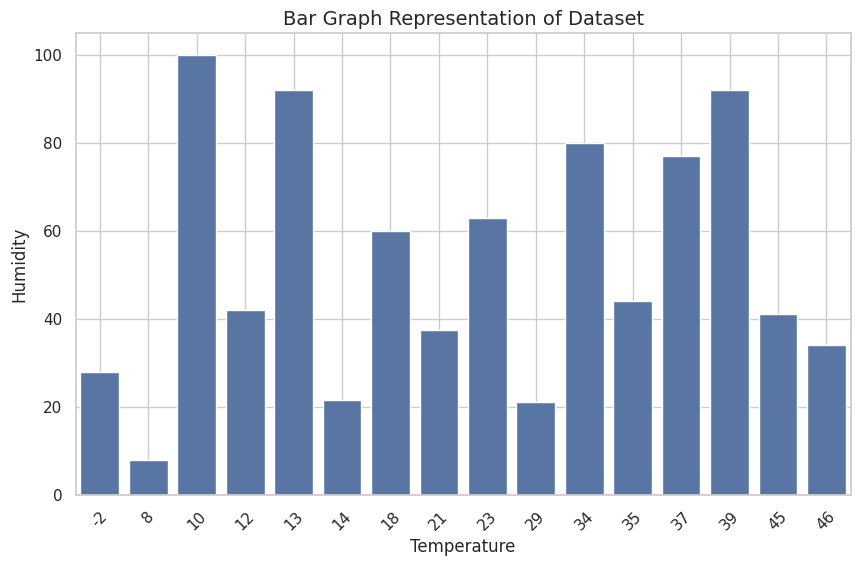

In [21]:
plt.figure(figsize=(10, 6))
if data.shape[1] >= 2:  # Ensure at least two columns for meaningful x and y
    sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]], ci=None)  # Update column selection as needed
    plt.title("Bar Graph Representation of Dataset", fontsize=14)
    plt.xlabel(data.columns[0], fontsize=12)
    plt.ylabel(data.columns[1], fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("\nBar Graph skipped: Dataset does not have sufficient columns.")

Interactive Visualization using Bokeh

In [28]:
!pip install bokeh

In [29]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Load your dataset
file_path = '/content/environmental_data.csv'  # Update this path if needed
data = pd.read_csv(file_path)

In [30]:
# Create a Bokeh line graph
# Assuming 'Temperature' and 'Humidity' are columns in your data
bokeh_line = figure(title="Bokeh Line Graph",
                    x_axis_label="Temperature",
                    y_axis_label="Humidity",
                    width=800,
                    height=400)

# Plot the line graph using the selected columns
# Convert range object to a list for serialization:
bokeh_line.line(list(range(len(data))), data['Humidity'], line_width=2, color="blue")

# Show the plot
output_notebook()  # For Jupyter Notebook environments
show(bokeh_line)


# Bar Graph using BokeH

In [32]:
# Bar Graph using Bokeh
bokeh_bar = figure(title="Bokeh Bar Graph", x_axis_label=data.columns[0], y_axis_label=data.columns[1], width=800, height=400)
if data.shape[1] >= 2:
    # Convert range object to a list before passing to vbar:
    bokeh_bar.vbar(x=list(range(len(data))), top=data[data.columns[1]], width=0.5, color="green")  # Update column selection
    show(bokeh_bar)
else:
    print("\nBokeh Bar Graph skipped: Dataset does not have sufficient columns.")

#PIE chart using BokeH

In [37]:
import pandas as pd
from math import pi
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import cumsum

# Load your CSV file
file_path = '/content/environmental_data.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Choose the column you want to create a pie chart for
# Instead of 'category', use an actual column name from your DataFrame
# Based on the global variables, 'Pressure' might be suitable
categorical_column = 'Pressure'  # Replace 'Pressure' with a suitable column if needed

# Check if the column is categorical or has fewer than 10 unique values
if data[categorical_column].dtype == 'object' or data[categorical_column].nunique() < 10:
    # Get the count of unique values in the categorical column
    pie_data = data[categorical_column].value_counts().reset_index(name='value')
    #Rename columns to generic names for plotting:
    pie_data.columns = ['category', 'value']

    # Add a column for the angle based on the value for each category (required for pie chart)
    pie_data['angle'] = pie_data['value'] / pie_data['value'].sum() * 2 * pi

    # Add a column for color to make the chart colorful
    pie_data['color'] = Category20c[len(pie_data)]

    # Create a pie chart using Bokeh
    p = figure(title=f"Pie Chart of {categorical_column}",
               toolbar_location=None,
               tools="hover", tooltips="@category: @value",
               x_range=(-1, 1))

    # Create a wedge (pie slice) for each category
    p.wedge(x=0, y=1, radius=0.4,
            start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="white", fill_color='color', legend_field='category', source=pie_data)

    # Formatting the plot
    p.axis.axis_label = None
    p.axis.visible = False
    p.grid.grid_line_color = None
    p.legend.location = "top_left"

    # Show the plot in a Jupyter Notebook (or use output_file() to save to an HTML file)
    output_notebook()
    show(p)
else:
    print(f"\nPie Chart skipped: '{categorical_column}' does not appear to be categorical.")


Pie Chart skipped: 'Pressure' does not appear to be categorical.
